<a href="https://colab.research.google.com/github/abdullahalmohit/RNAseq-With-Python/blob/main/Differential_Expression_Analysis_with_pyDEseq2%20(PCA%2C%20Heatmap%2C%20Volcano%20Plot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install pyDEseq2

In [51]:
%pip install pydeseq2

Load Packages

In [52]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

Load Combine RAW Count matrix

In [227]:
counts = pd.read_csv('/content/Combined_RAW_Counts.csv')
counts

,Geneid,SRR29685135,SRR29685136,SRR29685137,SRR29685138,SRR29685139,SRR29685140
0,AT1G01010,2318,5086,3511,1512,2284,2493
1,AT1G01020,1668,4736,4151,2421,2734,2902
2,AT1G03987,0,0,0,0,0,0
3,AT1G01030,71,123,105,67,80,99
4,AT1G01040,1249,2415,1702,2355,3052,3322
...,...,...,...,...,...,...,...
38290,ArthCt118,0,2,0,0,0,0
38291,ArthCp083,1,56,46,78,53,85
38292,ArthCt111,0,0,0,0,1,1
38293,ArthCp084,0,0,2,3,7,5


Make "Geneid" row index

In [228]:
counts = counts.set_index('Geneid')
counts

,SRR29685135,SRR29685136,SRR29685137,SRR29685138,SRR29685139,SRR29685140
Geneid,,,,,,
AT1G01010,2318,5086,3511,1512,2284,2493
AT1G01020,1668,4736,4151,2421,2734,2902
AT1G03987,0,0,0,0,0,0
AT1G01030,71,123,105,67,80,99
AT1G01040,1249,2415,1702,2355,3052,3322
...,...,...,...,...,...,...
ArthCt118,0,2,0,0,0,0
ArthCp083,1,56,46,78,53,85
ArthCt111,0,0,0,0,1,1


Filter Out Genes With Zero Counts in All Samples

In [229]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,SRR29685135,SRR29685136,SRR29685137,SRR29685138,SRR29685139,SRR29685140
Geneid,,,,,,
AT1G01010,2318,5086,3511,1512,2284,2493
AT1G01020,1668,4736,4151,2421,2734,2902
AT1G01030,71,123,105,67,80,99
AT1G01040,1249,2415,1702,2355,3052,3322
AT1G01046,7,14,11,17,21,32
...,...,...,...,...,...,...
ArthCt118,0,2,0,0,0,0
ArthCp083,1,56,46,78,53,85
ArthCt111,0,0,0,0,1,1


Transpose Count Matrix (Samples as Rows, Genes as Columns)

In [230]:
counts = counts.T
counts

Geneid,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01046,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
SRR29685135,2318,1668,71,1249,7,4850,0,1199,1829,156,...,0,36,0,0,0,0,1,0,0,0
SRR29685136,5086,4736,123,2415,14,14775,0,2798,4834,255,...,9,2303,1,24,15,2,56,0,0,30
SRR29685137,3511,4151,105,1702,11,11688,0,1928,3523,203,...,9,1829,0,24,3,0,46,0,2,30
SRR29685138,1512,2421,67,2355,17,9081,0,1579,1998,241,...,1,1394,0,10,4,0,78,0,3,43
SRR29685139,2284,2734,80,3052,21,11926,0,2199,3290,335,...,8,1254,0,6,4,0,53,1,7,32
SRR29685140,2493,2902,99,3322,32,12586,1,2153,2505,322,...,8,1440,0,16,12,0,85,1,5,54


Create Metadata Table Linking Samples to Experimental Conditions

In [231]:
metadata = pd.DataFrame(zip(counts.index, ['T','T','T', 'C', 'C', 'C',]),
                        columns = ['Sample', 'Condition'])

Set Sample Names as the Metadata Index

In [232]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
SRR29685135,T
SRR29685136,T
SRR29685137,T
SRR29685138,C
SRR29685139,C
SRR29685140,C


Create PyDESeq2 Dataset Linking Counts With Experimental Conditions

In [233]:
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition"
)

/tmp/ipython-input-356573844.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.


Run the Complete DESeq2 Pipeline (Normalization, Dispersion, Modeling)

In [234]:
dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 35.17 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 38.12 seconds.

Fitting LFCs...
... done in 24.17 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 0 outlier genes.



Inspect DESeq2 Dataset (dds)

In [235]:
# The following commands allow you to review the contents and status of the DESeq2 object:
#   dds                  → Display full dataset summary
#   dds.norm_counts      → View normalized counts matrix
#   dds.size_factors     → Check size factors used for normalization
#   dds.dispersions      → Inspect dispersion estimates for each gene
#   dds.colData          → View sample metadata linked to the dataset
#   dds.counts_df        → View raw counts stored inside the DESeq2 object
dds

AnnData object with n_obs × n_vars = 6 × 27688
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

Initialize PyDESeq2 Statistical Analysis (T vs C Contrast)

In [236]:
stat_res = DeseqStats(dds, n_cpus=8, contrast = ('Condition','T','C'))

Display Summary of Differential Expression Results

In [237]:
stat_res.summary()

Running Wald tests...
... done in 22.10 seconds.



Log2 fold change & Wald test p-value: Condition T vs C
              baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                     
AT1G01010  2783.409773        0.904959  0.116650  7.757910  8.634049e-15   
AT1G01020  2982.724194        0.437000  0.189795  2.302478  2.130821e-02   
AT1G01030    89.240373        0.408271  0.253054  1.613375  1.066631e-01   
AT1G01040  2262.951462       -0.587789  0.100755 -5.833864  5.415823e-09   
AT1G01046    16.149035       -1.005451  0.571428 -1.759540  7.848588e-02   
...                ...             ...       ...       ...           ...   
ArthCt118     0.257473        1.735667  4.353015  0.398727  6.900940e-01   
ArthCp083    49.771385       -1.170892  0.707305 -1.655428  9.783767e-02   
ArthCt111     0.282180       -1.580104  4.339610 -0.364112  7.157744e-01   
ArthCp084     2.615998       -2.734808  1.723471 -1.586802  1.125575e-01   
ArthCp085    29.354858       -1.1

Extract and Display Differential Expression Results Table

In [238]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14
AT1G01020,2982.724194,0.437000,0.189795,2.302478,2.130821e-02,4.121231e-02
AT1G01030,89.240373,0.408271,0.253054,1.613375,1.066631e-01,1.673376e-01
AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08
AT1G01046,16.149035,-1.005451,0.571428,-1.759540,7.848588e-02,1.290246e-01
...,...,...,...,...,...,...
ArthCt118,0.257473,1.735667,4.353015,0.398727,6.900940e-01,NaN
ArthCp083,49.771385,-1.170892,0.707305,-1.655428,9.783767e-02,1.555257e-01
ArthCt111,0.282180,-1.580104,4.339610,-0.364112,7.157744e-01,NaN


Export Differential Expression Results to CSV


In [239]:
res.to_csv("DESeq2_results_T_vs_C.csv")

Install BioMart

In [240]:
%pip install biomart

import BioMart and pandas

In [241]:
from biomart import BiomartServer
import pandas as pd
import io

Connect to Ensembl Plants BioMart

In [242]:
server = BiomartServer("http://plants.ensembl.org/biomart")

dataset = server.datasets['athaliana_eg_gene']

Fetch gene name + description

In [243]:
def fetch_annotations_in_batches(gene_list, batch_size=300):
    all_results = []

    for i in range(0, len(gene_list), batch_size):
        batch = gene_list[i : i + batch_size]
        batch_str = ",".join(batch)

        # Query BioMart
        response = dataset.search({
            'filters': {'tair_locus': batch_str},
            'attributes': [
                'tair_locus',
                'external_gene_name',
                'description'
            ]
        })

        # Convert generator → text → StringIO
        text = "\n".join([
            line.decode('utf-8') if isinstance(line, bytes) else line
            for line in response.iter_lines()
        ])

        # Skip empty responses
        if text.strip():
            df = pd.read_csv(io.StringIO(text), sep="\t", header=None)
            all_results.append(df)

    # Combine all batches into one DataFrame
    if all_results:
        return pd.concat(all_results, ignore_index=True)
    else:
        return pd.DataFrame(columns=['Geneid', 'Symbol', 'Description'])

Annotation to DEseq2 gene list

In [244]:
annot = fetch_annotations_in_batches(res.index.tolist())

Formate and merge

In [245]:
annot.columns = ['Geneid', 'Symbol', 'Description']
annot = annot.set_index('Geneid')

res = res.merge(annot, left_index=True, right_index=True, how='left')
res.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description
Geneid,,,,,,,,
AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001,NAC domain containing protein 1 [Source:NCBI g...
AT1G01020,2982.724194,0.437000,0.189795,2.302478,2.130821e-02,4.121231e-02,ARV1,ARV1 family protein [Source:NCBI gene (formerl...
AT1G01030,89.240373,0.408271,0.253054,1.613375,1.066631e-01,1.673376e-01,NGA3,AP2/B3-like transcriptional factor family prot...
AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
AT1G01046,16.149035,-1.005451,0.571428,-1.759540,7.848588e-02,1.290246e-01,ath-MIR838,ath-MIR838 [Source:miRBase;Acc:MI0005394]


Remove columns where all values are NaN

In [28]:
res = res.drop(columns=['Symbol_x', 'Description_x']) #use only when multiple symble and description column present in dataset, remove NaN

KeyError: "['Symbol_x', 'Description_x'] not found in axis"

In [72]:
print(res)

              baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                     
AT1G01010  2783.409773        0.904959  0.116650  7.757910  8.634049e-15   
AT1G01020  2982.724194        0.437000  0.189795  2.302478  2.130821e-02   
AT1G01030    89.240373        0.408271  0.253054  1.613375  1.066631e-01   
AT1G01040  2262.951462       -0.587789  0.100755 -5.833864  5.415823e-09   
AT1G01046    16.149035       -1.005451  0.571428 -1.759540  7.848588e-02   
...                ...             ...       ...       ...           ...   
ArthCt118     0.257473        1.735667  4.353015  0.398727  6.900940e-01   
ArthCp083    49.771385       -1.170892  0.707305 -1.655428  9.783767e-02   
ArthCt111     0.282180       -1.580104  4.339610 -0.364112  7.157744e-01   
ArthCp084     2.615998       -2.734808  1.723471 -1.586802  1.125575e-01   
ArthCp085    29.354858       -1.176998  0.789444 -1.490921  1.359824e-01   

           

Rename symbol_y and Description_y as symbol and Description

In [73]:
res = res.rename(columns={'Symbol_y': 'Symbol', 'Description_y': 'Description'})

In [246]:
print(res)

              baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Geneid                                                                     
AT1G01010  2783.409773        0.904959  0.116650  7.757910  8.634049e-15   
AT1G01020  2982.724194        0.437000  0.189795  2.302478  2.130821e-02   
AT1G01030    89.240373        0.408271  0.253054  1.613375  1.066631e-01   
AT1G01040  2262.951462       -0.587789  0.100755 -5.833864  5.415823e-09   
AT1G01046    16.149035       -1.005451  0.571428 -1.759540  7.848588e-02   
...                ...             ...       ...       ...           ...   
ArthCt118     0.257473        1.735667  4.353015  0.398727  6.900940e-01   
ArthCp083    49.771385       -1.170892  0.707305 -1.655428  9.783767e-02   
ArthCt111     0.282180       -1.580104  4.339610 -0.364112  7.157744e-01   
ArthCp084     2.615998       -2.734808  1.723471 -1.586802  1.125575e-01   
ArthCp085    29.354858       -1.176998  0.789444 -1.490921  1.359824e-01   

           

Filtering Significantly Differentially Expressed Genes (DEGs)

In [247]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [248]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description
Geneid,,,,,,,,
AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001,NAC domain containing protein 1 [Source:NCBI g...
AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
AT1G01120,6938.171913,1.878790,0.123595,15.201150,3.474655e-52,1.560127e-50,KCS1,3-ketoacyl-CoA synthase 1 [Source:NCBI gene (f...
AT1G01130,191.890548,-0.642849,0.200180,-3.211361,1.321080e-03,3.346764e-03,AT1G01130,CBL-interacting Serine/Threonine-kinase [Sourc...
AT1G01140,2435.037072,2.947565,0.173512,16.987715,1.012579e-64,6.283092e-63,CIPK9,CBL-interacting protein kinase 9 [Source:NCBI ...
...,...,...,...,...,...,...,...,...
AT5G67620,1305.623526,-1.459157,0.163689,-8.914178,4.914496e-19,5.519193e-18,AT5G67620,DUF4228 domain protein [Source:NCBI gene (form...
unassigned_gene_68,162.662495,0.820393,0.230571,3.558092,3.735592e-04,1.046547e-03,NaN,NaN
unassigned_gene_134,23.519181,-1.371885,0.527518,-2.600642,9.304942e-03,1.965600e-02,NaN,NaN


PRINCIPLE COMPONENT ANALYSIS

In [249]:
dds

AnnData object with n_obs × n_vars = 6 × 27688
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

Install scanpy

In [78]:
%pip install scanpy

import scanpy

In [79]:
import scanpy as sc

Performing Principal Component Analysis (PCA) on RNA-seq Data Using Scanpy

In [80]:
sc.tl.pca(dds)

Visualizing PCA of RNA-seq Data Colored by Experimental Condition

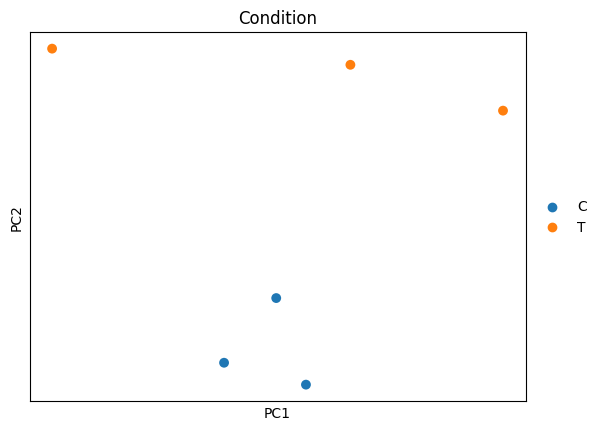

In [81]:
sc.pl.pca(dds, color = 'Condition', size = 200)

Import numpy and seaborn

In [210]:
import numpy as np
import seaborn as sns

Normalized Gene Expression Counts for Downstream Analysis

In [250]:
dds.layers['normed_counts']

array([[3.44731756e+03, 2.48064093e+03, 1.05590831e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.92852169e+03, 3.65817513e+03, 9.50075044e+01, ...,
        0.00000000e+00, 0.00000000e+00, 2.31725621e+01],
       [3.51101238e+03, 4.15101463e+03, 1.05000370e+02, ...,
        0.00000000e+00, 2.00000705e+00, 3.00001057e+01],
       [1.77195948e+03, 2.83724464e+03, 7.85193684e+01, ...,
        0.00000000e+00, 3.51579261e+00, 5.03930275e+01],
       [1.95829783e+03, 2.34412708e+03, 6.85918679e+01, ...,
        8.57398348e-01, 6.00178844e+00, 2.74367472e+01],
       [2.08334971e+03, 2.42514274e+03, 8.27322990e+01, ...,
        8.35679788e-01, 4.17839894e+00, 4.51267085e+01]])

Applying log1p Transformation to Normalized Gene Expression Counts

In [251]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [252]:
dds.layers['log1p']

array([[8.14564173, 7.81667529, 4.6689975 , ..., 0.        , 0.        ,
        0.        ],
       [8.27627299, 8.20499303, 4.56442636, ..., 0.        , 0.        ,
        3.18521819],
       [8.16394448, 8.33134895, 4.66344259, ..., 0.        , 1.09861464,
        3.43399062],
       [7.48040545, 7.95094106, 4.37600062, ..., 0.        , 1.50758072,
        3.93950251],
       [7.58034144, 7.76009487, 4.24264772, ..., 0.61917677, 1.94616561,
        3.34768222],
       [7.6422122 , 7.79405793, 4.42762479, ..., 0.60741487, 1.64449592,
        3.83139214]])

Significant genes from a differential expression analysis

In [253]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description
Geneid,,,,,,,,
AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001,NAC domain containing protein 1 [Source:NCBI g...
AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
AT1G01120,6938.171913,1.878790,0.123595,15.201150,3.474655e-52,1.560127e-50,KCS1,3-ketoacyl-CoA synthase 1 [Source:NCBI gene (f...
AT1G01130,191.890548,-0.642849,0.200180,-3.211361,1.321080e-03,3.346764e-03,AT1G01130,CBL-interacting Serine/Threonine-kinase [Sourc...
AT1G01140,2435.037072,2.947565,0.173512,16.987715,1.012579e-64,6.283092e-63,CIPK9,CBL-interacting protein kinase 9 [Source:NCBI ...
...,...,...,...,...,...,...,...,...
AT5G67620,1305.623526,-1.459157,0.163689,-8.914178,4.914496e-19,5.519193e-18,AT5G67620,DUF4228 domain protein [Source:NCBI gene (form...
unassigned_gene_68,162.662495,0.820393,0.230571,3.558092,3.735592e-04,1.046547e-03,NaN,NaN
unassigned_gene_134,23.519181,-1.371885,0.527518,-2.600642,9.304942e-03,1.965600e-02,NaN,NaN


Creating a Dataset Containing Only Significant Genes for Downstream Analysis

In [254]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 6 × 9433
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

Transpose and Convert log1p-normalized Counts to a Pandas DataFrame for Plotting

In [217]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

Clustermap (Heatmap)

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


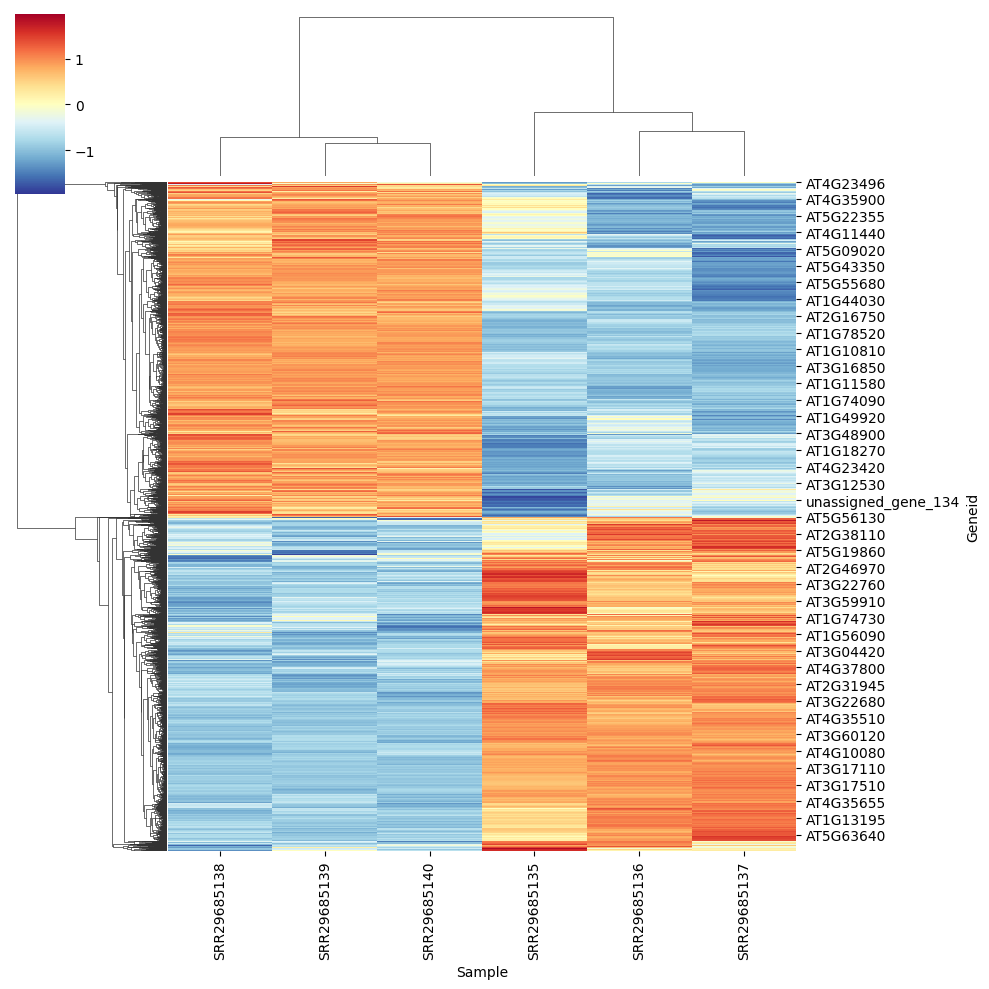

In [218]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [255]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description
Geneid,,,,,,,,
AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001,NAC domain containing protein 1 [Source:NCBI g...
AT1G01020,2982.724194,0.437000,0.189795,2.302478,2.130821e-02,4.121231e-02,ARV1,ARV1 family protein [Source:NCBI gene (formerl...
AT1G01030,89.240373,0.408271,0.253054,1.613375,1.066631e-01,1.673376e-01,NGA3,AP2/B3-like transcriptional factor family prot...
AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
AT1G01046,16.149035,-1.005451,0.571428,-1.759540,7.848588e-02,1.290246e-01,ath-MIR838,ath-MIR838 [Source:miRBase;Acc:MI0005394]
...,...,...,...,...,...,...,...,...
ArthCt118,0.257473,1.735667,4.353015,0.398727,6.900940e-01,NaN,NaN,NaN
ArthCp083,49.771385,-1.170892,0.707305,-1.655428,9.783767e-02,1.555257e-01,NaN,NaN
ArthCt111,0.282180,-1.580104,4.339610,-0.364112,7.157744e-01,NaN,NaN,NaN


In [256]:
annot


,Symbol,Description
Geneid,,
AT1G01010,NAC001,NAC domain containing protein 1 [Source:NCBI g...
AT1G01020,ARV1,ARV1 family protein [Source:NCBI gene (formerl...
AT1G01030,NGA3,AP2/B3-like transcriptional factor family prot...
AT1G01040,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
AT1G01046,ath-MIR838,ath-MIR838 [Source:miRBase;Acc:MI0005394]
...,...,...
AT5G67600,WIH1,cysteine-rich TM module stress tolerance prote...
AT5G67610,AT5G67610,transmembrane protein (DUF2215) [Source:NCBI g...
AT5G67620,AT5G67620,DUF4228 domain protein [Source:NCBI gene (form...


In [272]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description
Geneid,,,,,,,,
AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001,NAC domain containing protein 1 [Source:NCBI g...
AT1G01020,2982.724194,0.437000,0.189795,2.302478,2.130821e-02,4.121231e-02,ARV1,ARV1 family protein [Source:NCBI gene (formerl...
AT1G01030,89.240373,0.408271,0.253054,1.613375,1.066631e-01,1.673376e-01,NGA3,AP2/B3-like transcriptional factor family prot...
AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
AT1G01046,16.149035,-1.005451,0.571428,-1.759540,7.848588e-02,1.290246e-01,ath-MIR838,ath-MIR838 [Source:miRBase;Acc:MI0005394]
...,...,...,...,...,...,...,...,...
ArthCt118,0.257473,1.735667,4.353015,0.398727,6.900940e-01,NaN,NaN,NaN
ArthCp083,49.771385,-1.170892,0.707305,-1.655428,9.783767e-02,1.555257e-01,NaN,NaN
ArthCt111,0.282180,-1.580104,4.339610,-0.364112,7.157744e-01,NaN,NaN,NaN


Creating a log1p expression DataFrame for target genes

In [293]:
# Define your gene list
gene_list = ['AT2G23380', 'AT4G02020', 'AT1G02580', 'AT2G35670', 'AT3G20740', 'AT5G58230']

# Subset the AnnData object to only these genes
dds_subset = dds[:, dds.var_names.isin(gene_list)]

# Create the DataFrame
grapher = pd.DataFrame(
    dds_subset.layers['log1p'].T,
    index=dds_subset.var_names,
    columns=dds_subset.obs_names
)

grapher

Sample,SRR29685135,SRR29685136,SRR29685137,SRR29685138,SRR29685139,SRR29685140
Geneid,,,,,,
AT1G02580,4.150444,3.789979,3.761204,4.433279,4.890645,4.634272
AT2G23380,8.459536,8.416190,8.503301,8.235744,8.333328,8.392588
AT2G35670,1.379871,2.329132,2.302588,2.219586,0.998717,0.607415
AT3G20740,7.242423,7.685304,7.711553,7.990212,8.003279,8.007566
AT4G02020,8.511717,8.539969,8.626051,7.790013,7.903261,7.921015
AT5G58230,8.177058,8.035895,8.119402,8.143406,8.307652,8.234365


Identify Symbol for target gene

In [294]:
annot_sub = annot[annot.index.isin(gene_list)]
annot_sub

,Symbol,Description
Geneid,,
AT1G02580,MEA,SET domain-containing protein [Source:NCBI gen...
AT2G23380,CLF,SET domain-containing protein [Source:NCBI gen...
AT2G35670,FIS2,VEFS-Box of polycomb protein [Source:NCBI gene...
AT3G20740,FIE,Transducin/WD40 repeat-like superfamily protei...
AT4G02020,SWN,SET domain-containing protein [Source:NCBI gen...
AT5G58230,MSI1,Transducin/WD40 repeat-like superfamily protei...


Replace geneid with gene name

In [295]:
# Define the mapping from Geneid to Symbol
gene_to_symbol = {
    "AT1G02580": "MEA",
    "AT2G23380": "CLF",
    "AT2G35670": "FIS2",
    "AT3G20740": "FIE",
    "AT4G02020": "SWN",
    "AT5G58230": "MSI1"
}

# Replace the index in grapher using the mapping
grapher.index = grapher.index.map(gene_to_symbol)

# Display the updated grapher
grapher


Sample,SRR29685135,SRR29685136,SRR29685137,SRR29685138,SRR29685139,SRR29685140
Geneid,,,,,,
MEA,4.150444,3.789979,3.761204,4.433279,4.890645,4.634272
CLF,8.459536,8.416190,8.503301,8.235744,8.333328,8.392588
FIS2,1.379871,2.329132,2.302588,2.219586,0.998717,0.607415
FIE,7.242423,7.685304,7.711553,7.990212,8.003279,8.007566
SWN,8.511717,8.539969,8.626051,7.790013,7.903261,7.921015
MSI1,8.177058,8.035895,8.119402,8.143406,8.307652,8.234365


Visualization (cluster heatmap)

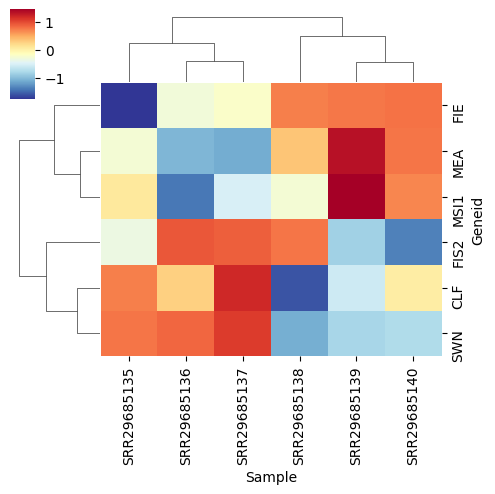

In [297]:
# Define colors for each condition
condition_colors = {'T': 'blue', 'C': 'orange'}

# Map the conditions from metadata to colors for the columns of the clustermap
# Ensure the order of colors matches the order of columns in 'grapher'
col_colors = metadata['Condition'].map(condition_colors)

# Create the clustermap with column colors
ax = sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r', figsize=(5,5), col_colors=col_colors)

Volcano Plot with sanbolics

In [299]:
%pip install sanbomics

In [300]:
from sanbomics.plots import volcano

In [301]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description
Geneid,,,,,,,,
AT1G01010,2783.409773,0.904959,0.116650,7.757910,8.634049e-15,7.203149e-14,NAC001,NAC domain containing protein 1 [Source:NCBI g...
AT1G01020,2982.724194,0.437000,0.189795,2.302478,2.130821e-02,4.121231e-02,ARV1,ARV1 family protein [Source:NCBI gene (formerl...
AT1G01030,89.240373,0.408271,0.253054,1.613375,1.066631e-01,1.673376e-01,NGA3,AP2/B3-like transcriptional factor family prot...
AT1G01040,2262.951462,-0.587789,0.100755,-5.833864,5.415823e-09,2.826062e-08,DCL1,dicer-like 1 [Source:NCBI gene (formerly Entre...
AT1G01046,16.149035,-1.005451,0.571428,-1.759540,7.848588e-02,1.290246e-01,ath-MIR838,ath-MIR838 [Source:miRBase;Acc:MI0005394]
...,...,...,...,...,...,...,...,...
ArthCt118,0.257473,1.735667,4.353015,0.398727,6.900940e-01,NaN,NaN,NaN
ArthCp083,49.771385,-1.170892,0.707305,-1.655428,9.783767e-02,1.555257e-01,NaN,NaN
ArthCt111,0.282180,-1.580104,4.339610,-0.364112,7.157744e-01,NaN,NaN,NaN


0s encountered for p value, imputing 1e-323
impute your own value if you want to avoid this


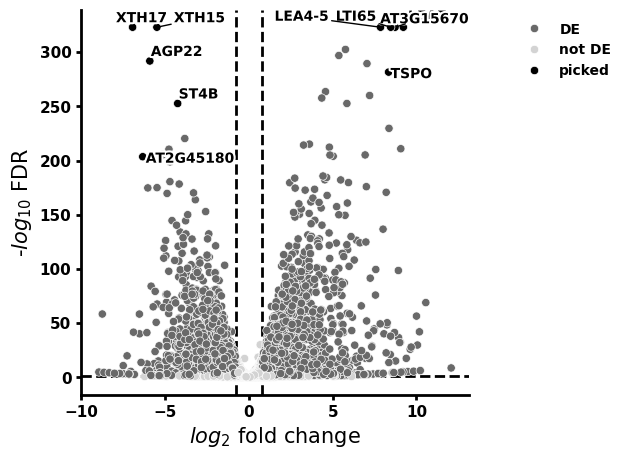

In [309]:
volcano(res, symbol='Symbol')

Heatmap with matplotlib

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


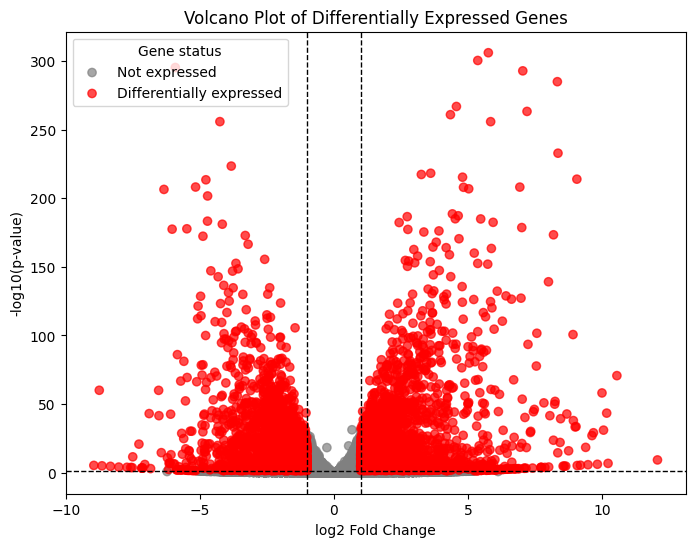

In [311]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new column for status
res['status'] = np.where(
    (res['padj'] < 0.05) & (res['log2FoldChange'].abs() > 1), 'Differentially expressed',
    'Not expressed'
)

# Calculate -log10(p-value) for y-axis
res['minus_log10_p'] = -np.log10(res['pvalue'])

# Assign colors for plotting
color_map = {'Differentially expressed': 'red', 'Not expressed': 'grey'}
res['color'] = res['status'].map(color_map)

# Plot
plt.figure(figsize=(8,6))
for status in res['status'].unique():
    subset = res[res['status'] == status]
    plt.scatter(subset['log2FoldChange'], subset['minus_log10_p'],
                c=subset['color'], label=status, alpha=0.7)

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of Differentially Expressed Genes')
plt.axhline(-np.log10(0.05), color='black', linestyle='--', linewidth=1)
plt.axvline(1, color='black', linestyle='--', linewidth=1)
plt.axvline(-1, color='black', linestyle='--', linewidth=1)
plt.legend(title='Gene status')
plt.show()